<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-JSOrtegaB/blob/main/Semana8/Actividad_Semanal_7_Regresiones_y_K_means_JuanSebastianOrtegaBriones_A01794327.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Semana 8: Actividad Semanal -- 7 Regresiones y K means
## Ciencia y analítica de datos
### Profesor: María de la Paz Rico Fernández
### Juan Sebastián Ortega Briones A01794327

# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [2]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

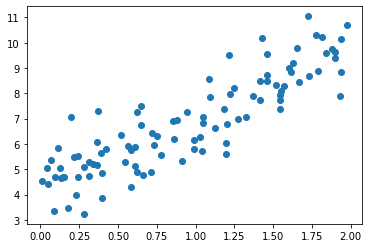

In [3]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [4]:
import pandas as pd
pd.DataFrame(y).head()

,0
0,6.334288
1,9.405278
2,8.483724
3,5.604382
4,4.716440


In [5]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [6]:
#X_fit[]

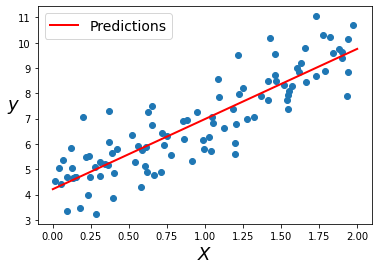

In [7]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [8]:
linear_reg.score(X,y)

0.7692735413614223

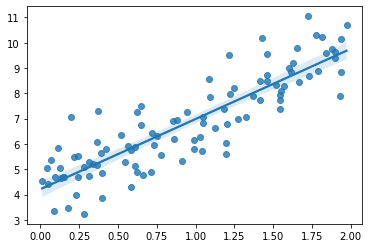

In [9]:
sns.regplot(x=X, y=y )

Predictions are a good fit.

Generate new data to make predictions with the model:

In [10]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [11]:
X_new.shape

(2, 1)

In [12]:
y_new = linear_reg.predict(X_new)
y_new

array([[4.21509616],
       [9.75532293]])

In [13]:
 linear_reg.coef_, linear_reg.intercept_

(array([[2.77011339]]), array([4.21509616]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [14]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [15]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

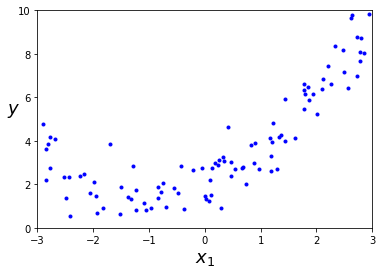

In [16]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [17]:
import pandas as pd
pd.DataFrame(y).head()

,0
0,6.600226
1,1.308278
2,3.011698
3,2.730748
4,0.916311


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [18]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [19]:
#X_poly

`X_poly` now contains the original feature of X plus the square of the feature:

In [20]:
print(X[0])
print(X[0]*X[0])


[1.76886782]
[3.12889337]


In [21]:
X_poly[0]

array([1.76886782, 3.12889337])

Fit the model to this extended training data:

In [22]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04630034, 0.5015459 ]]), array([1.99958228]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

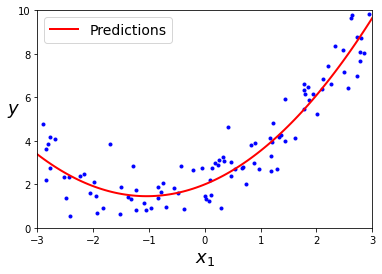

In [23]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [24]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
522,4.522099,35.184621
636,4.955669,39.806448
432,4.229502,42.065907
961,6.942155,23.531414
932,6.488086,33.202574
338,3.941359,39.665873
724,5.248591,33.973200
935,6.532977,25.434653
21,1.784342,57.681940
916,6.312071,32.452728


In [25]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [26]:
len(X)

1000

In [27]:
y.describe()

count    1000.000000
mean       40.052999
std        10.595322
min        20.000000
25%        32.912036
50%        38.345781
75%        44.531822
max       100.000000
Name: Manufacturing Cost, dtype: float64

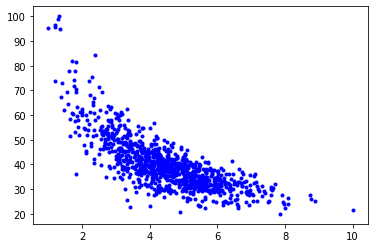

In [28]:
plt.plot(X,y,'b.')

## Lineal

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)
print("número de muestras de prueba :", x_test.shape[0])
print("número de muestras de entrenamiento:",x_train.shape[0])
print("número de muestras:",X.shape[0])

número de muestras de prueba : 100
número de muestras de entrenamiento: 900
número de muestras: 1000


In [31]:
lnr=LinearRegression()

In [32]:
lnr.fit(x_train,y_train)
R2_Regresion_Lineal=lnr.score(x_test,y_test)
print("R^2:",R2_Regresion_Lineal)

R^2: 0.4731766343360183


In [33]:
MSE_Regresion_Lineal=mean_squared_error(y_test, lnr.predict(x_test))
MSE_Regresion_Lineal

53.75365860956318

### Equación

In [34]:
print("Entrenamiento (X):",lnr.score(x_train, y_train))
print("Prueba (R):",lnr.score(x_test, y_test))

Entrenamiento (X): 0.5894048956827378
Prueba (R): 0.4731766343360183


In [35]:
print("Equacion: y =", lnr.coef_[0].round(2),"x +",lnr.intercept_.round(2))

Equacion: y = -6.1 x + 67.38


$\hat{y} =  -6.1 x  + 67.38$

### Visualización de datos y gráfica

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


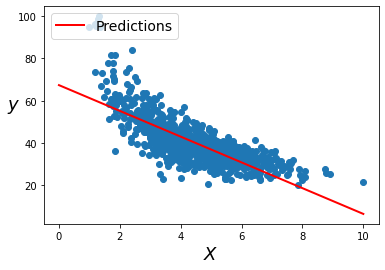

In [36]:
X_fit = np.linspace(0,10, 100)
y_fit = lnr.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

### Gráfico de errores

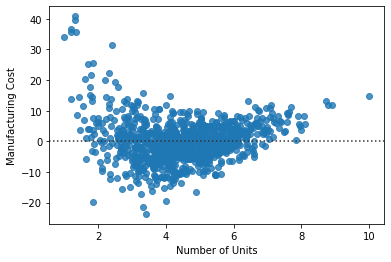

In [37]:
sns.residplot(x=X,y=y)
plt.show()

## Polinomial

In [38]:
from sklearn.preprocessing import PolynomialFeatures

In [39]:
poly_features = PolynomialFeatures(degree=5, include_bias=False)
X_poly = poly_features.fit_transform(x_train)
X_poly_test = poly_features.fit_transform(x_test)

### Equación

In [40]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y_train)


LinearRegression()

In [41]:
print('y = ',lin_reg.coef_[0],'x + ',lin_reg.coef_[1],'x^2 + ', lin_reg.coef_[2],'x^3 + ',lin_reg.coef_[3],'x^4 + ',lin_reg.coef_[4],'x^5 + ',lin_reg.intercept_)

y =  -83.80568199256658 x +  26.818838010405145 x^2 +  -4.574164277430585 x^3 +  0.3899121915051563 x^4 +  -0.013017234118987099 x^5 +  153.10806603273565


$\hat{y} =  -83.80 x + 26.81x^2 - 4.57x^3 + 0.3899x^4 - 0.0130x^5 + 153.10$

In [42]:
R2_Polinomial=lin_reg.score(X_poly_test, y_test)
print("R2=",R2_Polinomial)

R2= 0.6091512908137173


In [43]:
MSE_Polinomial=mean_squared_error(y_test, lin_reg.predict(X_poly_test))
print("MSE=",MSE_Polinomial)

MSE= 39.87968159899002


### Visualización

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


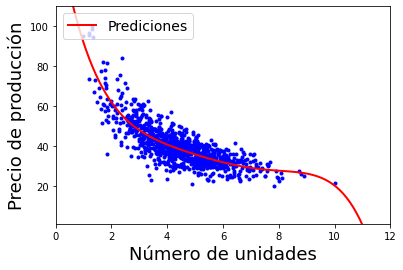

In [44]:
X_new=np.linspace(0, 12, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Prediciones")
plt.xlabel("Número de unidades", fontsize=18 )
plt.ylabel("Precio de producción", rotation=90, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 12, 1,110]);
plt.show()

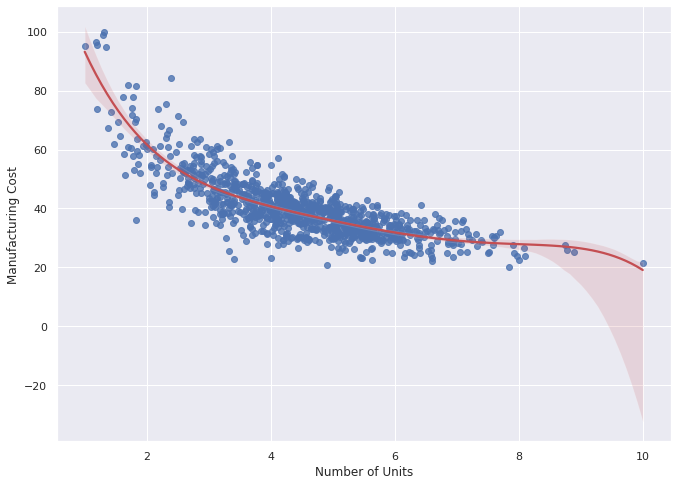

In [45]:
sns.set(rc={'figure.figsize':(11,8)})
sns.regplot(x=X,y=y, order=5 ,line_kws=dict(color="r"))

### Error residual

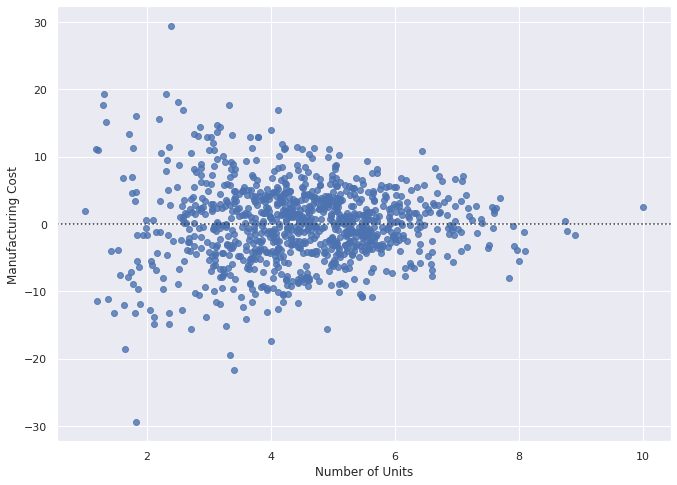

In [46]:
sns.residplot(x=X,y=y,order=5)

### Con Ridge

In [47]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [48]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)
x_test_copy=x_test
print("número de muestras de prueba :", x_test.shape[0])
print("número de muestras de entrenamiento:",x_train.shape[0])
print("número de muestras:",X.shape[0])
order=5

número de muestras de prueba : 100
número de muestras de entrenamiento: 900
número de muestras: 1000


In [49]:
pr=PolynomialFeatures(degree=order)
x_train=pr.fit_transform(x_train)
x_test=pr.fit_transform(x_test)

In [50]:
RidgeModel=Ridge(alpha=10**-5)

In [51]:
RidgeModel.fit(x_train, y_train)

Ridge(alpha=1e-05)

In [52]:
R2_Ridge=RidgeModel.score(x_test, y_test)
print('R2=',R2_Ridge)

R2= 0.6091494987956567


In [53]:
yhat = RidgeModel.predict(x_test)
MSE_Ridge=mean_squared_error(y_test, RidgeModel.predict(x_test))
print("MSE=",MSE_Ridge)

MSE= 39.87986444495572


In [54]:
print('predicted:', yhat[0:4].round(1))
print('test set :', y_test[0:4].values.round(1))

predicted: [38.3 33.2 39.2 40.4]
test set : [39.9 32.1 46.5 39.6]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


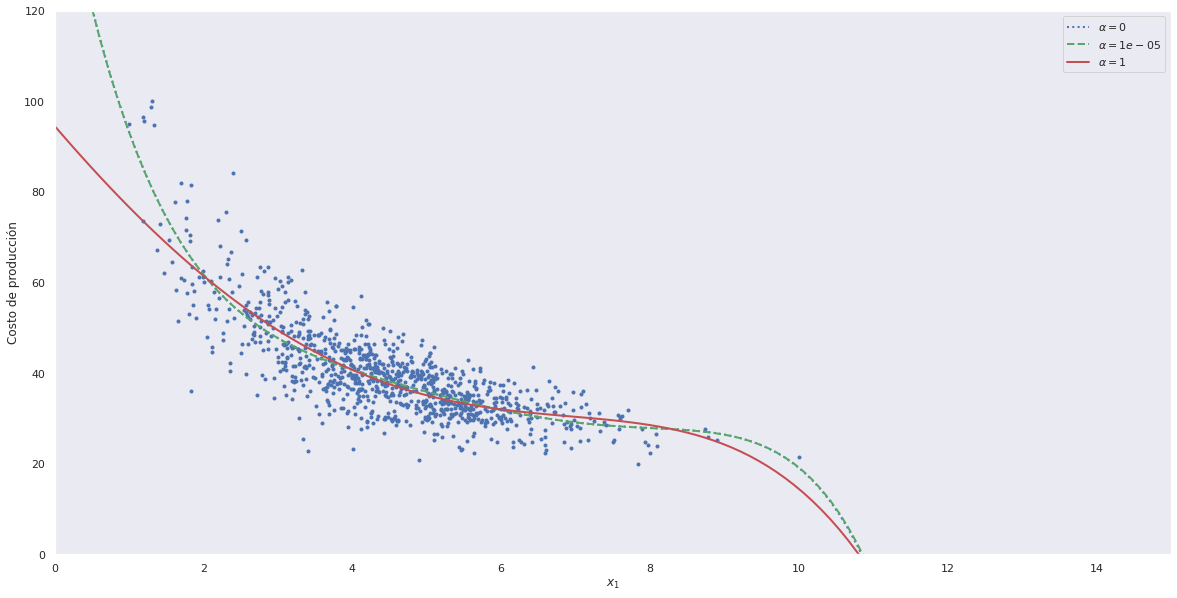

In [55]:
def plot_model(model_class, polynomial, alphas, **model_kwargs):
    plt.plot(X, y, "b.", linewidth=3)
    for alpha, style in zip(alphas, ("b:", "g--", "r-")):
        if alpha > 0:
            model = model_class(alpha, **model_kwargs)
        else:
            model = LinearRegression()
        if polynomial:
            model = make_pipeline(
                PolynomialFeatures(degree=order, include_bias=False),
                StandardScaler(),
                model)
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        plt.plot(X_new, y_new_regul, style, linewidth=2,
                 label=fr"$\alpha = {alpha}$")
    plt.legend(loc="upper right")
    plt.xlabel("$x_1$")
    plt.axis([0, 15, 0, 120])
    plt.grid()

plt.figure(figsize=(20, 10))
#plt.subplot(121)
#plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("Costo de producción", rotation=90)
#plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
#plt.gca().axes.yaxis.set_ticklabels([])
#save_fig("ridge_regression_plot")
plt.show()

In [56]:
RidgeModel.coef_

array([ 0.00000000e+00, -8.38002114e+01,  2.68163182e+01, -4.57363248e+00,
        3.89860080e-01, -1.30153201e-02])

In [57]:
RidgeModel.intercept_

153.10380094081006

$\hat{y} =  -83.80 x  + 26.81 x^2 - 4.57x^3 + 0.389x^4 -0.01301x^5 + 153.10$

### Con Lasso

In [58]:
from sklearn.linear_model import Lasso

In [59]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)

In [60]:
lassoReg = Lasso(alpha=10**-5)

In [61]:
pr=PolynomialFeatures(degree=order)
x_train=pr.fit_transform(x_train)
x_test=pr.fit_transform(x_test)

In [62]:
lassoReg.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.556e+04, tolerance: 1.019e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lasso(alpha=1e-05)

In [63]:
pred = lassoReg.predict(x_train)

In [64]:
R2_Lasso=lassoReg.score(x_test, y_test)
print('R2 =',R2_Lasso)

R2 = 0.576864802644444


In [65]:
yhat = RidgeModel.predict(x_test)
MSE_Lasso=mean_squared_error(y_test, lassoReg.predict(x_test))
print("MSE=",MSE_Lasso)

MSE= 43.173986627707684


Coeficientes e intercepción para la equación

In [66]:
lassoReg.coef_

array([ 0.00000000e+00, -2.57779352e+01,  2.76191017e+00, -1.85649998e-02,
       -9.58852953e-03,  9.47465826e-05])

In [67]:
lassoReg.intercept_

103.02889891013876

$\hat{y} =−25.77𝑥+2.76𝑥^2−0.0185𝑥^3-0.009588𝑥^4+0.0000947𝑥^5+103.02$

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.418e+02, tolerance: 1.121e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


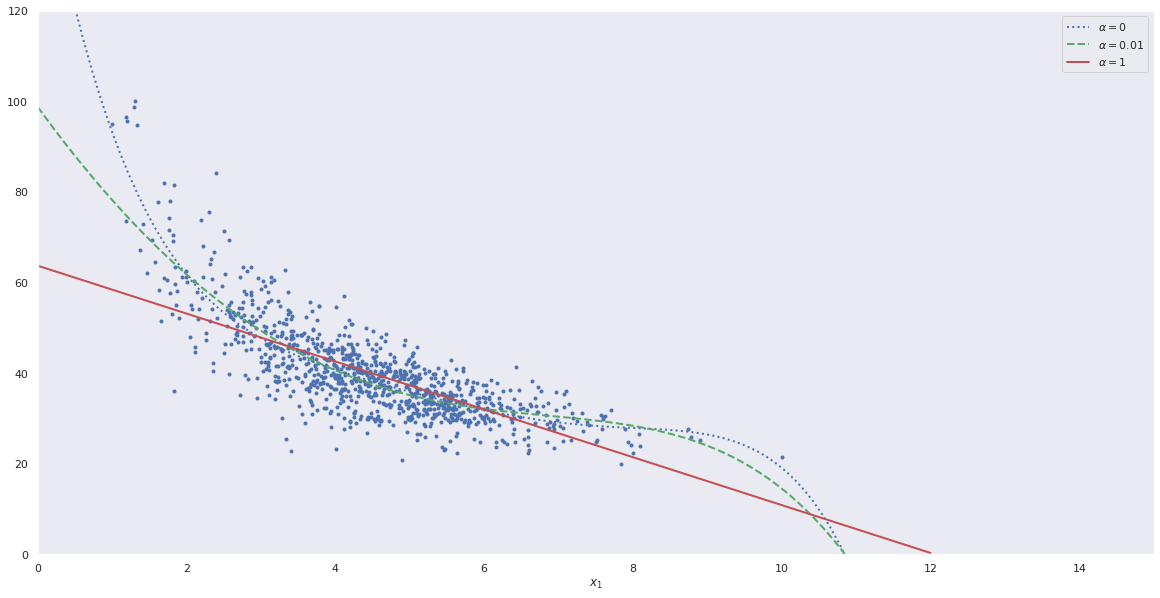

In [68]:
plt.figure(figsize=(20, 10))
plot_model(Lasso, polynomial=True, alphas=(0, 1e-2, 1), random_state=42)
plt.show()

## Errores

### MSE

In [69]:
errores=[{'Regresion Lineal':MSE_Regresion_Lineal, 'Polinomial':MSE_Polinomial, 'Ridge':MSE_Ridge, 'Lasso':MSE_Lasso}]
errores=pd.DataFrame(errores)
errores

,Regresion Lineal,Polinomial,Ridge,Lasso
0,53.753659,39.879682,39.879864,43.173987


In [101]:
errores.min()

Regresion Lineal    53.753659
Polinomial          39.879682
Ridge               39.879864
Lasso               43.173987
dtype: float64

### R2

In [70]:
errores_r2=[{'Regresion Lineal':R2_Regresion_Lineal, 'Polinomial':R2_Polinomial, 'Ridge':R2_Ridge, 'Lasso':R2_Lasso}]
errores_r2=pd.DataFrame(errores_r2)
errores_r2

,Regresion Lineal,Polinomial,Ridge,Lasso
0,0.473177,0.609151,0.609149,0.576865


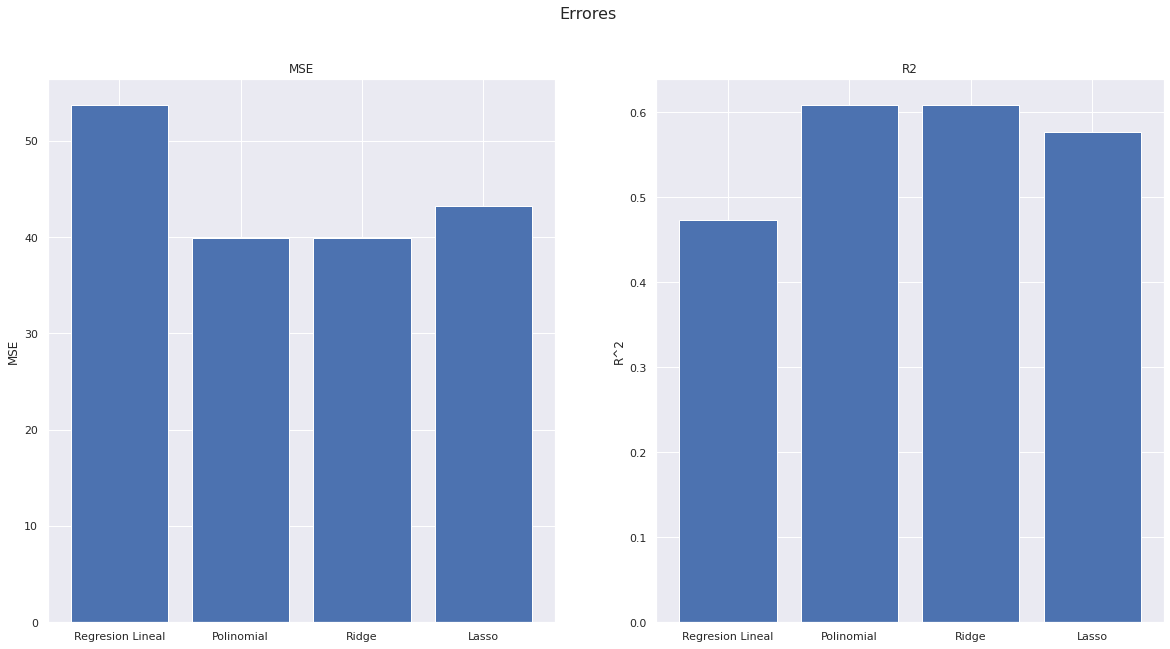

In [71]:
fig, axes = plt.subplots(1,2)
fig.set_size_inches(20, 10)
axes[0].bar(x=errores.columns, height=errores.values[0])
axes[0].set_ylabel('MSE')
axes[0].set_title('MSE')
axes[1].set_title('R2')
axes[1].bar(x=errores_r2.columns, height=errores_r2.values[0])
axes[1].set_ylabel('R^2')
fig.suptitle('Errores', fontsize=16)

plt.show()


# Conclusiones



1.   El metodo que mas conviene es el poliomial o Ridge con un alfa de $1\mathrm{e-5}$
2.   Use 90% para entrenamiento y 10% para pruebas
3.   El error es apromimadamente de 39%, creo que no es muy bueno, para fines de negocio un 39% de error en el marjen de utilidad es mucho. 








#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [72]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4291,6184700100,20140926T000000,599000.0,2,1.00,1550,7713,1.0,0,0,...,7,1550,0,1930,1979,98117,47.7005,-122.358,1340,6350
14922,4287400005,20140731T000000,393000.0,4,2.00,1450,5456,1.0,0,0,...,7,1450,0,1951,0,98108,47.5442,-122.297,980,6100
19868,7518506715,20140506T000000,979000.0,3,2.50,2690,4047,3.0,0,0,...,10,2690,0,2014,0,98117,47.6797,-122.385,2040,5000
12669,619079061,20140619T000000,335000.0,4,2.00,2030,103672,1.0,0,0,...,7,2030,0,1969,0,98022,47.1647,-121.973,1560,325393
12570,3095000040,20141016T000000,315000.0,1,0.75,770,4600,1.0,0,0,...,6,770,0,1910,0,98126,47.5565,-122.377,1550,4600
3511,9232900165,20150123T000000,418500.0,2,1.00,790,5800,1.0,0,0,...,6,790,0,1943,0,98117,47.6973,-122.360,1460,5800
6399,2475900840,20150427T000000,258000.0,2,1.00,750,7000,1.0,0,0,...,6,750,0,1932,0,98024,47.5655,-121.890,1100,8777
18540,203101530,20140530T000000,475000.0,2,2.00,1540,54450,2.0,0,0,...,7,1540,0,1983,0,98053,47.6380,-121.953,2280,29918
14461,3902300210,20140715T000000,607000.0,4,2.75,2150,16728,1.0,0,0,...,8,1240,910,1982,0,98033,47.6915,-122.183,2200,9257
6904,7524350080,20150318T000000,349900.0,4,2.50,2290,8796,2.0,0,0,...,8,2290,0,1994,0,98198,47.3762,-122.318,2130,8796


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [74]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [75]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


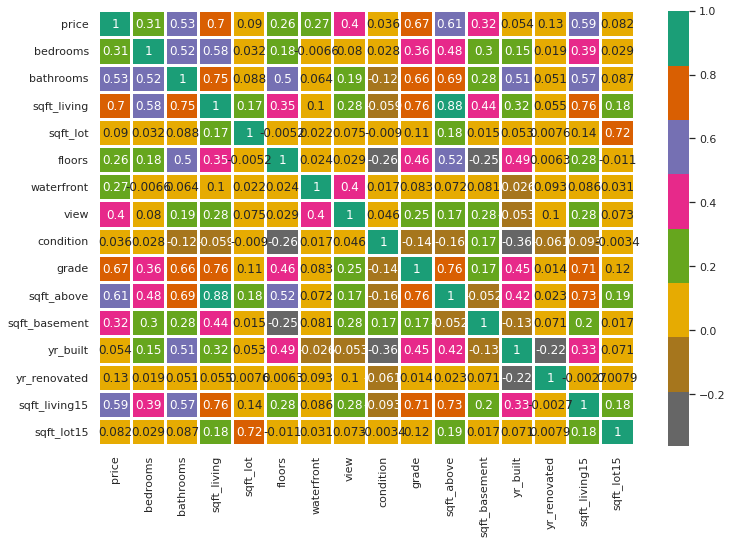

In [76]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [77]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


In [79]:
X_train.shape

(19451, 15)

### Regresión Múltiple Lineal

In [80]:
lnm=LinearRegression()

In [81]:
lnm.fit(X_train,y_train)
lnm_r2=lnm.score(X_train,y_train)
print('R^2=', lnm_r2)

R^2= 0.6529196653133834


In [82]:
lnm_MSE=mean_squared_error(y_test,lnm.predict(X_test))
print('MSE=', lnm_MSE)

MSE= 53885900364.49265


Equación

In [83]:
print('y=', end=" ")
for n in range(lnm.coef_[0].shape[0]):
  print(lnm.coef_[0][n].round(2),'*',X_train.columns[n] ,end =" + ")
print(lnm.intercept_[0].round(2))

y= -38200.8 * bedrooms + 41466.14 * bathrooms + 107.99 * sqft_living + 0.02 * sqft_lot + 31691.69 * floors + 552691.02 * waterfront + 41249.32 * view + 21222.14 * condition + 119493.22 * grade + 47.78 * sqft_above + 60.22 * sqft_basement + -3550.9 * yr_built + 13.26 * yr_renovated + 29.01 * sqft_living15 + -0.55 * sqft_lot15 + 6151359.26


### Regresión Multiple Polinomial

In [84]:
pr=PolynomialFeatures(degree=4)
X_train_poly=pr.fit_transform(X_train)
X_test_poly=pr.fit_transform(X_test)

In [85]:
lin_reg_m = LinearRegression(fit_intercept=True)
lin_reg_m.fit(X_train_poly, y_train)

LinearRegression()

In [86]:
X_train_poly.shape

(19451, 3876)

In [87]:
rmp_r2=lin_reg_m.score(X_train_poly,y_train)
print("R2=",rmp_r2)

R2= 0.7946680818065248


In [88]:
rmp_MSE=mean_squared_error(y_test,lin_reg_m.predict(X_test_poly))
print("MSE=",rmp_MSE)

MSE= 383251298494.13525


### Ridge

In [89]:
reg_mult_ridge=Ridge(alpha=10)

In [90]:
reg_mult_ridge.fit(X_train_poly, y_train)

Ridge(alpha=10)

In [91]:
rmp_ridge_r2=reg_mult_ridge.score(X_train_poly, y_train)
print('R2=', rmp_ridge_r2)

R2= 0.7240555128354826


In [92]:
rmp_ridge_MSE=mean_squared_error(y_test,reg_mult_ridge.predict(X_test_poly))
print('MSE=',rmp_ridge_MSE)

MSE= 310758983821.772


### Lasso

In [93]:
lassoReg_ej2 = Lasso(alpha=1)

In [94]:
lassoReg_ej2.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.053e+14, tolerance: 2.572e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lasso(alpha=1)

In [95]:
rmp_lasso_r2=lassoReg_ej2.score(X_train,y_train)
print('R2=',rmp_lasso_r2)

R2= 0.652919664114342


In [96]:
rmp_lasso_MSE=mean_squared_error(y_test,reg_mult_ridge.predict(X_test_poly))
print('MSE=',rmp_lasso_MSE)

MSE= 310758983821.772


### Errores

In [97]:
errores_ej2=[{'Regresion Lineal':lnm_MSE, 'Polinomial':rmp_MSE, 'Ridge':rmp_ridge_MSE, 'Lasso':rmp_lasso_MSE}]
errores_ej2=pd.DataFrame(errores_ej2)
errores_ej2

,Regresion Lineal,Polinomial,Ridge,Lasso
0,5.388590e+10,3.832513e+11,3.107590e+11,3.107590e+11


In [98]:
errores_ej2_r2=[{'Regresion Lineal':lnm_r2, 'Polinomial':rmp_r2, 'Ridge':rmp_ridge_r2, 'Lasso':rmp_lasso_r2}]
errores_ej2_r2=pd.DataFrame(errores_ej2_r2)
errores_ej2_r2

,Regresion Lineal,Polinomial,Ridge,Lasso
0,0.65292,0.794668,0.724056,0.65292


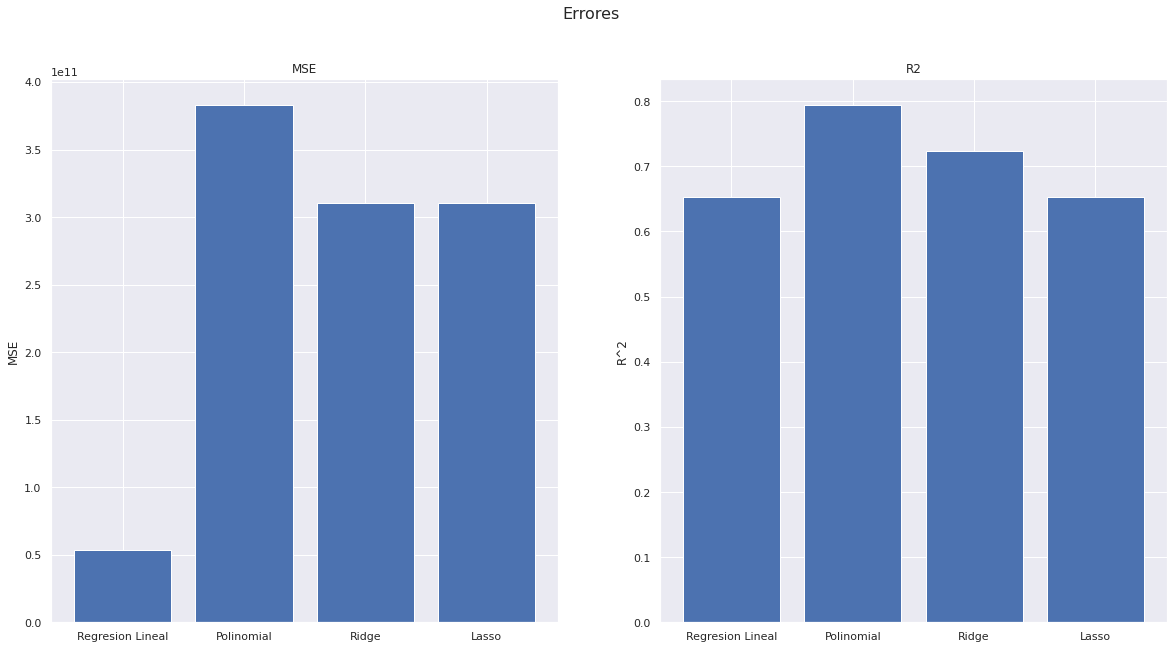

In [99]:
fig, axes = plt.subplots(1,2)
fig.set_size_inches(20, 10)
axes[0].bar(x=errores_ej2.columns, height=errores_ej2.values[0])
axes[0].set_ylabel('MSE')
axes[0].set_title('MSE')
axes[1].set_title('R2')
axes[1].bar(x=errores_ej2_r2.columns, height=errores_ej2_r2.values[0])
axes[1].set_ylabel('R^2')
fig.suptitle('Errores', fontsize=16)

plt.show()

### Conclusiones

1.   En este caso estoy confundido, no coinciden el MSE yel R^2, usando MSE la regresión lineal es el mejor metodo, usando R^2 la regresión polinomial es el mejor método
2.   Use 90% para entrenamiento y 10% para pruebas
3.   El error en R^2 es apromimadamente de 21%, creo que es malo para haber usado tantos features. 